In [10]:
import numpy as np
import matplotlib.pyplot as plt

from Code import *
from Code.environment import *
from Code.data import *
import Code.utils as utils

from Code.environment.Environment import Environment


In [11]:
cust_json = "customer_classes.json"
today_customer = 50
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"

arms = np.array([
  [5, 6.5, 8, 10],
  [16, 17.3, 18.5, 19.3],
  [67, 69.8, 72, 73.6],
  [12, 13.5, 15.7, 16.2],
  [101.4, 102.3, 103.5, 105]
  ])
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
clairvoyant_arms, clairvoyant_reward = environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward)

loading: [          ] 0%[0, 0, 0, 0, 0] 68.8293945313
[0, 0, 0, 0, 1] 79.3111328125
[0, 0, 0, 0, 2] 89.7928710938
[0, 0, 0, 0, 3] 97.162109375
[0, 0, 0, 1, 0] 74.8061523438
[0, 0, 0, 1, 1] 85.287890625
[0, 0, 0, 1, 2] 95.7696289063
[0, 0, 0, 1, 3] 103.1246875
[0, 0, 0, 2, 0] 80.7829101562
[0, 0, 0, 2, 1] 91.2646484375
loading: [=         ] 1%[0, 0, 0, 2, 2] 101.746386719
[0, 0, 0, 2, 3] 109.087265625
[0, 0, 0, 3, 0] 86.0137109375
[0, 0, 0, 3, 1] 96.3165625
[0, 0, 0, 3, 2] 106.619414062
[0, 0, 0, 3, 3] 113.8191875
[0, 0, 1, 0, 0] 89.0012695313
[0, 0, 1, 0, 1] 99.4830078125
[0, 0, 1, 0, 2] 109.964746094
[0, 0, 1, 0, 3] 117.043359375
loading: [=         ] 2%[0, 0, 1, 1, 0] 94.9780273438
[0, 0, 1, 1, 1] 105.459765625
[0, 0, 1, 1, 2] 115.941503906
[0, 0, 1, 1, 3] 123.0059375
[0, 0, 1, 2, 0] 100.954785156
[0, 0, 1, 2, 1] 111.436523438
[0, 0, 1, 2, 2] 121.918261719
[0, 0, 1, 2, 3] 128.968515625
[0, 0, 1, 3, 0] 105.803554687
[0, 0, 1, 3, 1] 116.10640625
loading: [=         ] 3%[0, 0, 1, 3, 2] 

[2, 2, 0, 2, 1] 155.662695312
loading: [=======   ] 64%[2, 2, 0, 2, 2] 166.144433594
[2, 2, 0, 2, 3] 167.869921875
[2, 2, 0, 3, 0] 150.041679687
[2, 2, 0, 3, 1] 160.34453125
[2, 2, 0, 3, 2] 170.647382813
[2, 2, 0, 3, 3] 172.32725
[2, 2, 1, 0, 0] 153.399316406
[2, 2, 1, 0, 1] 163.881054688
[2, 2, 1, 0, 2] 174.362792969
[2, 2, 1, 0, 3] 175.826015625
loading: [=======   ] 65%[2, 2, 1, 1, 0] 159.376074219
[2, 2, 1, 1, 1] 169.8578125
[2, 2, 1, 1, 2] 180.339550781
[2, 2, 1, 1, 3] 181.78859375
[2, 2, 1, 2, 0] 165.352832031
[2, 2, 1, 2, 1] 175.834570313
[2, 2, 1, 2, 2] 186.316308594
[2, 2, 1, 2, 3] 187.751171875
[2, 2, 1, 3, 0] 169.831523438
[2, 2, 1, 3, 1] 180.134375
loading: [=======   ] 66%[2, 2, 1, 3, 2] 190.437226563
[2, 2, 1, 3, 3] 191.8306875
[2, 2, 2, 0, 0] 173.571191406
[2, 2, 2, 0, 1] 184.052929688
[2, 2, 2, 0, 2] 194.534667969
[2, 2, 2, 0, 3] 195.707265625
[2, 2, 2, 1, 0] 179.547949219
[2, 2, 2, 1, 1] 190.0296875
[2, 2, 2, 1, 2] 200.511425781
[2, 2, 2, 1, 3] 201.66984375
loading: [=

In [12]:
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner

In [13]:
import numpy as np

In [14]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 10
NUM_ITERATION = 2

# TODO: we should put the customer argument as optional,since greedy learner has no need of customer(no simulation)
rewards_iterations = []
for i in range(NUM_ITERATION):
    gr_learner = GreedyLearner(n_arms, n_products, customer, graph_json, arms)

    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = gr_learner.select_superarm()
        report = environment.round(super_arm)
        gr_learner.update(super_arm.copy(), report)
        prices = [arms[p][a] for p, a in enumerate(super_arm)]
    rewards = gr_learner.get_rewards()
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

loading: [          ] 0%

(2, 10)

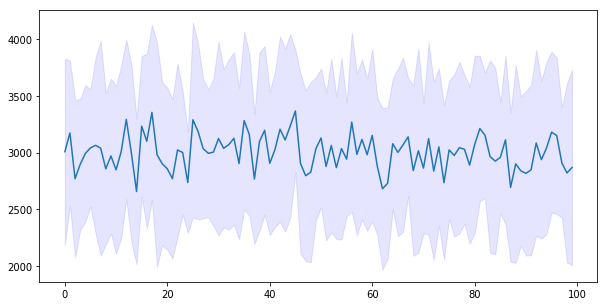

In [7]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

# plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

In [8]:
aggregate_customer = Customer(
    0,
    0,
    environment.get_aggregate_alphas(),
    environment.get_aggregate_num_prods_distribution(),
    environment.get_aggregate_click_graph()
    )


In [22]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb1_learner = UCBLearner(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb1_learner.select_superarm()
        report = environment.round(super_arm)
        ucb1_learner.update(super_arm.copy(), report)
    rewards = ucb1_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [          ] 0%Iteration # 2
loading: [          ] 0%

In [ ]:
ucb1_learner.estimate_conversion_rates()

In [ ]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

In [ ]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner = TSLearner(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts_learner.select_superarm()
        report = environment.round(super_arm)
        ts_learner.update(super_arm.copy(), report)
    rewards = ts_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

In [ ]:
ts_learner.estimate_conversion_rates()

In [ ]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

# plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

In [ ]:
for t in range(TIME_HORIZON):
    if t % 10 == 0:
        utils.progress_bar(t, TIME_HORIZON)
    super_arm = ts_learner.select_superarm()
    report = environment.round(super_arm)
    ts_learner.update(super_arm.copy(), report)

In [ ]:
rewards = ts_learner.history_rewards


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot([_ for _ in range(len(rewards))], rewards)
# plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()


In [ ]:
for t in range(TIME_HORIZON):
    if t % 10 == 0:
        utils.progress_bar(t, TIME_HORIZON)
    super_arm = ts_learner.select_superarm()
    report = environment.round(super_arm)
    ts_learner.update(super_arm.copy(), report)

In [ ]:
rewards = ts_learner.history_rewards

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot([_ for _ in range(len(rewards))], rewards)
plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()
